# Zebrafish

In [ ]:
# get the latest version from pypi 
# for other installations approaches, see https://dynamo-release.readthedocs.io/en/latest/ten_minutes_to_dynamo.html#how-to-install
!pip install dynamo-release --upgrade --quiet

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

In [2]:
import dynamo as dyn 

In [3]:
dyn.get_all_dependencies_version()

package,dynamo-release,tqdm,anndata,cvxopt,hdbscan,loompy,matplotlib,numba,numpy,pandas,pynndescent,python-igraph,scikit-learn,scipy,seaborn,setuptools,statsmodels,trimap,umap-learn,numdifftools,colorcet
version,0.95.0,4.48.0,0.7.4,1.2.3,0.8.26,3.0.6,3.3.0,0.48.0,1.19.1,1.1.0,0.4.8,0.8.2,0.23.1,1.5.2,0.9.0,49.3.1,0.11.1,1.0.12,0.4.3,0.9.39,2.0.2


In [4]:
dyn.configuration.set_figure_params('dynamo', background='white')


In [5]:

adata = dyn.read_h5ad('/Users/xqiu/Dropbox (Personal)/dynamo/dont_remove/zebrafish.h5ad')


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [6]:
dyn.pp.recipe_monocle(adata) 

/Users/xqiu/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/xqiu/anaconda3/lib/python3.6/site-packages/dynamo_release-0.95.0-py3.6.egg/dynamo/preprocessing/preprocess.py:1441: UserWarning: Dynamo is not able to perform cell cycle staging for you automatically. 
Since dyn.pl.phase_diagram in dynamo by default color cells by its cell-cycle stage, 
you need to set color argument accordingly if confronting errors related to this.
  warnings.warn('Dynamo is not able to perform cell cycle staging for you automatically. \n'


AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_pca', 'ntr'
    uns: 'velocyto_SVR', 'pp_norm_method', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection'
    obsm: 'X_pca', 'X'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced'

In [7]:
dyn.tl.dynamics(adata, model='stochastic', cores=3) # support multi-core parallelism 

/Users/xqiu/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'velocyto_SVR', 'pp_norm_method', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_pca', 'X'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con'

/Users/xqiu/anaconda3/lib/python3.6/site-packages/dynamo_release-0.95.0-py3.6.egg/dynamo/plot/scatters.py:452: FutureWarning: Categorical.to_dense is deprecated and will be removed in a future version.  Use np.asarray(cat) instead.
  labels = _color.to_dense() if is_categorical_dtype(_color) else _color


<Figure size 600x400 with 0 Axes>

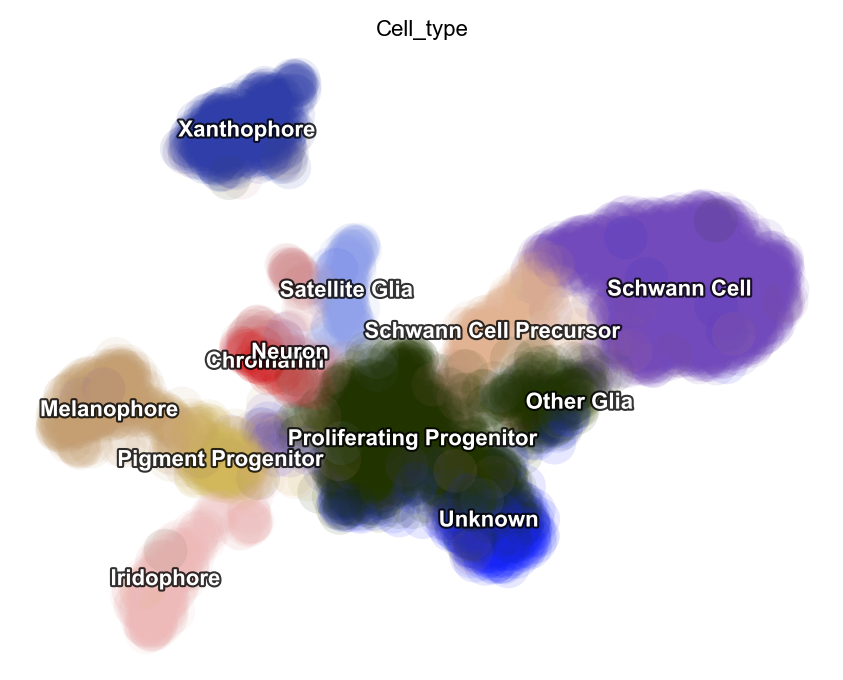

In [8]:
dyn.tl.reduceDimension(adata)

dyn.pl.umap(adata, color='Cell_type')

In [9]:
dyn.tl.cell_velocities(adata, method='pearson', other_kernels_dict={'transform': 'sqrt'})


/Users/xqiu/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
calculating transition matrix via pearson kernel with sqrt transform.: 100%|██████████| 4181/4181 [00:09<00:00, 443.97it/s]
projecting velocity vector to low dimensional embedding...: 100%|██████████| 4181/4181 [00:01<00:00, 4099.89it/s]


AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_velocity'
    uns: 'velocyto_SVR', 'pp_norm_method', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities'

In [ ]:
dyn.pl.phase_portraits(adata, genes=adata.var_names[adata.var.use_for_dynamics][:4], figsize=(6, 4), color='Cell_type')

/Users/xqiu/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [ ]:
dyn.pl.cell_wise_vectors(adata, color=['Cell_type'], basis='umap', show_legend='on data', quiver_length=6, quiver_size=6, pointsize=0.1, show_arrowed_spines=False)


In [ ]:
dyn.pl.streamline_plot(adata, color=['Cell_type'], basis='umap', show_legend='on data', show_arrowed_spines=True)


In [ ]:
dyn.vf.VectorField(adata, basis='umap', pot_curl_div=True) 

In [ ]:

dyn.pl.plot_energy(adata) 


In [ ]:
dyn.pl.topography(adata, basis='umap', background='white', color=['ntr', 'Cell_type'], streamline_color='black', show_legend='on data', frontier=True)


In [ ]:
dyn.tl.cell_velocities(adata, basis='pca')
dyn.vf.VectorField(adata, basis='pca')
dyn.vf.speed(adata)
dyn.vf.divergence(adata)
dyn.vf.acceleration(adata)
dyn.vf.curl(adata)

In [ ]:
import numpy as np 

fig3_si5 = ['mitfa', 'pax3a', 'tfec', 'dct', 'alx4b', 'tyrp1b', 'gpnmb', 'pmela', 'pnp4a']

dyn.pl.scatters(adata, x=np.repeat('umap_ddhodge_potential', 9), pointsize=0.25, alpha=0.8, y=fig3_si5, layer='X_spliced', color='Cell_type',
                ncols=3, background='white', figsize=(7, 4))


In [ ]:
dyn.pl.umap(adata,  color='umap_ddhodge_potential', frontier=True)

In [ ]:
import matplotlib.pyplot as plt

fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(12, 8))
f1_axes
f1_axes[0, 0] = dyn.pl.cell_wise_vectors(adata, color='umap_ddhodge_potential', pointsize=0.1, alpha = 0.7, ax=f1_axes[0, 0], quiver_length=6, quiver_size=6, save_show_or_return='return')
f1_axes[0, 1] = dyn.pl.grid_vectors(adata, color='speed_umap', ax=f1_axes[0, 1], quiver_length=12, quiver_size=12, save_show_or_return='return')
f1_axes[1, 0] = dyn.pl.streamline_plot(adata, color='divergence_pca', ax=f1_axes[1, 0], save_show_or_return='return')
f1_axes[1, 1] = dyn.pl.streamline_plot(adata, color='acceleration_umap', ax=f1_axes[1, 1], save_show_or_return='return')
plt.show()

In [ ]:
# emulate ggplot2 plotting styple with black background, get ready for a cool presentation

dyn.configuration.set_figure_params('dynamo', background='black')  

In [ ]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(12, 8))
f1_axes
f1_axes[0, 0] = dyn.pl.cell_wise_vectors(adata, color='umap_ddhodge_potential', pointsize=0.1, alpha = 0.7, ax=f1_axes[0, 0], quiver_length=6, quiver_size=6, save_show_or_return='return', background='black')
f1_axes[0, 1] = dyn.pl.grid_vectors(adata, color='speed_umap', ax=f1_axes[0, 1], quiver_length=12, quiver_size=12, save_show_or_return='return', background='black')
f1_axes[1, 0] = dyn.pl.streamline_plot(adata, color='divergence_pca', ax=f1_axes[1, 0], save_show_or_return='return', background='black')
f1_axes[1, 1] = dyn.pl.streamline_plot(adata, color='acceleration_umap', ax=f1_axes[1, 1], save_show_or_return='return', background='black')
plt.show()